In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from numpy.random import normal,seed
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
import math

In [3]:
siguniang = pd.read_csv('Datasets/Mt_Siguniang_2018-2020.csv',  parse_dates = ['Date'])

In [4]:
siguniang.columns

Index(['Date', 'Tourist_Arrival_volume'], dtype='object')

In [5]:
siguniang = siguniang.fillna(method="ffill")
siguniang.head()

,Date,Tourist_Arrival_volume
0,2018-01-01,1074.0
1,2018-01-02,294.0
2,2018-01-03,196.0
3,2018-01-04,174.0
4,2018-01-05,192.0


In [6]:
siguniang['Date'] = pd.to_datetime(siguniang['Date'],format='%Y%m%d')

In [7]:
siguniang['year'] = pd.DatetimeIndex(siguniang['Date']).year
siguniang['month'] = pd.DatetimeIndex(siguniang['Date']).month
siguniang['day'] = pd.DatetimeIndex(siguniang['Date']).day

In [8]:
siguniang.columns

Index(['Date', 'Tourist_Arrival_volume', 'year', 'month', 'day'], dtype='object')

In [9]:
siguniang.head()

,Date,Tourist_Arrival_volume,year,month,day
0,2018-01-01,1074.0,2018,1,1
1,2018-01-02,294.0,2018,1,2
2,2018-01-03,196.0,2018,1,3
3,2018-01-04,174.0,2018,1,4
4,2018-01-05,192.0,2018,1,5


In [10]:
X = siguniang.iloc[:,2:].values
Y = siguniang.iloc[:,1].values

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 17)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(644, 3) (114, 3) (644,) (114,)


In [12]:
Y_test

array([  455.,  2091.,  1553.,   607.,  1338.,  3239.,  1878.,   222.,
         410.,   314.,   180.,   542.,  3313.,  3013.,   552.,  5815.,
         290.,  4213.,   576.,   664.,   497.,  1354.,   292.,  7522.,
        1883.,   865.,  3814.,  2766.,  4664.,   859.,  1075., 12325.,
        1399.,   140.,  2308.,  1135.,   575.,  1454.,  1169.,  4471.,
        1298.,   418.,   599.,  1015.,   743.,   165.,   283.,  1030.,
        3125.,   312.,  5285.,  2556.,  2624.,   796.,   155.,   270.,
        7619.,   306.,   642.,  1726.,  3020.,   823.,   130.,    95.,
        2685.,  1188.,   999.,  1787.,  1879.,   333.,  1273.,  3421.,
        1788.,   242.,   771.,  2490.,  4573.,   442.,   618.,   395.,
        1014.,   792.,  1045.,  3122.,   105.,   279.,  1430.,  4696.,
        1251.,  1033.,   430.,  6709.,  2818.,  1358.,   603.,  6767.,
        1119.,   129.,   312.,   440.,   305.,    96.,   314.,   988.,
         974.,  4516.,   831.,   203.,   115.,   463.,   462.,   212.,
      

In [13]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 1000, random_state = 17)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=17)

In [14]:
predictions = rf.predict(X_test)
predictions

array([  346.407,  2112.527,  1704.202,  2108.695,  1595.835,  3389.808,
        1920.126,   466.658,   243.304,   354.574,   269.526,   938.902,
        3798.456,  3069.516,   740.476,  4296.472,   354.891,  4823.145,
         609.372,   769.678,   881.154,  1279.134,   378.686,  4802.992,
        2036.012,  1099.733,  3611.101,  3139.768,  3086.143,   815.498,
        1352.584, 11488.793,  1274.589,   121.724,  2427.213,  1121.754,
         595.24 ,   671.303,  1812.374,  4392.394,  2151.216,   687.825,
         269.22 ,  1385.017,   381.325,   296.841,   288.466,  2698.647,
        2706.628,   321.043,  4755.792,   670.382,  1634.284,   928.682,
         271.161,   281.071,  5285.769,   608.29 ,   878.901,  2235.948,
        3086.238,  1412.738,   219.875,   277.385,  2321.729,  2034.415,
         855.256,  1989.111,  1724.801,   460.632,  1581.678,  1034.475,
        1542.056,   261.066,  1172.532,  1690.99 ,  4047.027,   399.89 ,
        1628.256,   443.773,   679.387,   378.995, 

In [15]:
mean_squared_error(Y_test, predictions)

605571.2264337281

In [16]:
print('RMSE: ',math.sqrt(mean_squared_error(Y_test, predictions)))

RMSE:  778.1845709301413


In [17]:
explained_variance_score(Y_test, predictions)

0.8418592270987004

In [18]:
mean_absolute_percentage_error(Y_test, predictions)

0.49689264052640125

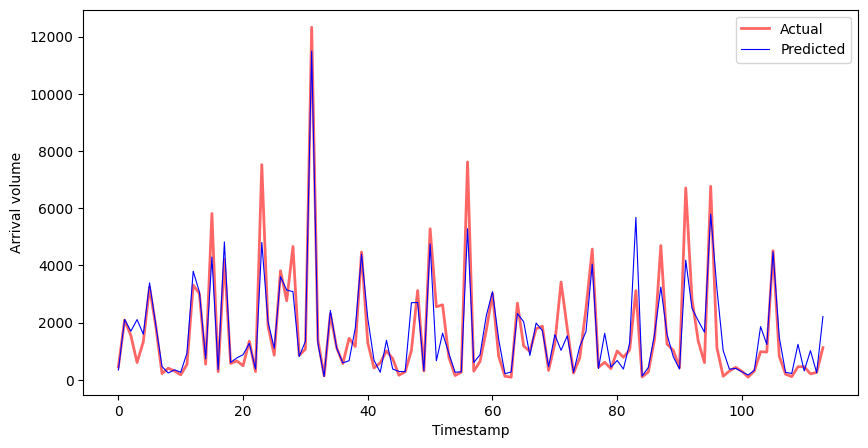

In [19]:
plt.figure(figsize=(10,5))
plt.plot(Y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(predictions, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.ylabel('Arrival volume')
plt.show()

In [20]:
#Linear Regression
reg = LinearRegression().fit(X_train, Y_train)

In [21]:
Y_test

array([  455.,  2091.,  1553.,   607.,  1338.,  3239.,  1878.,   222.,
         410.,   314.,   180.,   542.,  3313.,  3013.,   552.,  5815.,
         290.,  4213.,   576.,   664.,   497.,  1354.,   292.,  7522.,
        1883.,   865.,  3814.,  2766.,  4664.,   859.,  1075., 12325.,
        1399.,   140.,  2308.,  1135.,   575.,  1454.,  1169.,  4471.,
        1298.,   418.,   599.,  1015.,   743.,   165.,   283.,  1030.,
        3125.,   312.,  5285.,  2556.,  2624.,   796.,   155.,   270.,
        7619.,   306.,   642.,  1726.,  3020.,   823.,   130.,    95.,
        2685.,  1188.,   999.,  1787.,  1879.,   333.,  1273.,  3421.,
        1788.,   242.,   771.,  2490.,  4573.,   442.,   618.,   395.,
        1014.,   792.,  1045.,  3122.,   105.,   279.,  1430.,  4696.,
        1251.,  1033.,   430.,  6709.,  2818.,  1358.,   603.,  6767.,
        1119.,   129.,   312.,   440.,   305.,    96.,   314.,   988.,
         974.,  4516.,   831.,   203.,   115.,   463.,   462.,   212.,
      

In [22]:
predictions_lr = reg.predict(X_test)
predictions_lr

array([2143.15582707, 1642.68413175, 1531.09982853, 1439.28636046,
       2479.04509459, 1676.79055584, 1619.08351186,  664.46222635,
       2331.49168261, 1233.04235446, 1458.17806096, 1870.66607296,
       2034.41775857, 2342.87662145,  785.56878373, 2063.71084788,
        775.06297952, 1912.32765115, 2543.42815803, 1114.78203179,
       1052.36606842, 1515.88510494,  597.2329282 ,  682.37037681,
       1279.3644596 , 1324.85582254, 1767.62047388, 1346.59375775,
       1883.03456184, 2236.83197982, 1228.33343508, 2549.12062745,
       1915.17388586, 1276.51822489, 1127.98126287, 1197.07324569,
       1506.51565861, 1055.21230313, 2370.30702609, 1876.35854238,
       2076.07933676, 1327.70205725,  139.25355326, 1103.39709294,
       2573.70479737,  576.47854302, 2385.36894184, 1736.3602845 ,
       2118.57165715,  297.31276945, 1791.22109377, 1111.93579708,
       1352.28622717,  864.03021289, 1321.02603779, 1267.14877855,
       1670.11453638, 1940.74160582, 1169.64284106, 1976.71071

In [23]:
mean_squared_error(Y_test, predictions_lr)

3541099.917446616

In [24]:
print('RMSE for linear regression: ',math.sqrt(mean_squared_error(Y_test,predictions_lr)))

RMSE for linear regression:  1881.7810492845908


In [25]:
mean_absolute_percentage_error(Y_test, predictions_lr)

1.8895068349764208

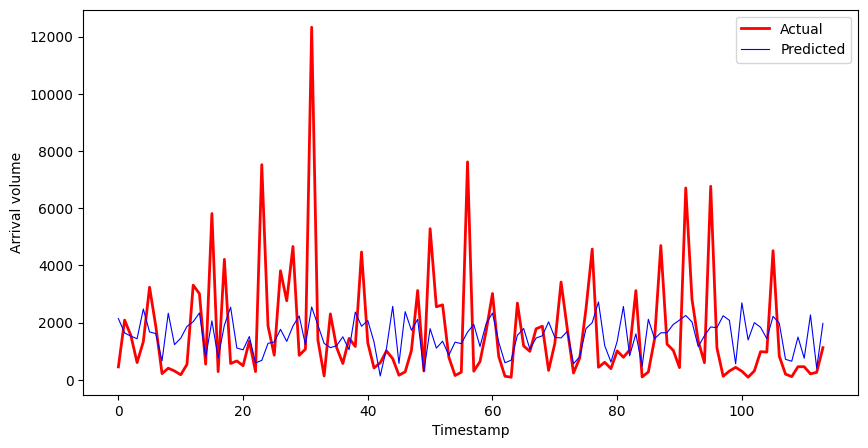

In [26]:
plt.figure(figsize=(10,5))
plt.plot(Y_test, color = 'red', linewidth=2.0)
plt.plot(predictions_lr, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.ylabel('Arrival volume')
plt.show()